---
># AFP_2022_2_K_10_Akropolisz Gépi tanulás framework
---
Hadobás Dávid (TB3376), Kardos Zsolt (O48WRX), Riczkó Henrik (D5GPJ6), Balogh Mihály Viktor (GUFVXA)
---

In [ ]:
import math, numpy, random
adatbazis_helye = "xd" #@param {type:"string"}
#@markdown --- 
algoritmus = 'A' #@param ["A", "B", "C"]
aktivaciosfgv = 'sigmoid' #@param ['tanh', 'sigmoid']
Bs = 0 #@param {type:"number"}
nnszelesseg = 4 #@param {type:"number"}
nnmagassag = 3 #@param {type:"number"}
sulymin = 5 #@param {type:"number"}
sulymax = 7 #@param {type:"number"}
print('Választott algoritmus: ', algoritmus)
print('Választott aktivációs függvény: ', aktivaciosfgv)
print('Választott BIAS: ', Bs)
print('Választott szélesség: ', nnszelesseg)
print('Választott magasság: ', nnmagassag)
print('Választott minimum súly: ', sulymin)
print('Választott maximum súly: ', sulymax)

Választott algoritmus:  A
Választott aktivációs függvény:  sigmoid
Választott BIAS:  0
Választott szélesség:  4
Választott magasság:  3
Választott minimum súly:  5
Választott maximum súly:  7


## Jelen állapotban az első kódblokkot a drop-down menük opciói kiválasztása után újra kell futtatni!!!!

In [ ]:
if aktivaciosfgv == 'tanh':
  def activation(x):
    return numpy.tanh(x)
  def dactivation(x):
    return 1.0 - x**2
elif aktivaciosfgv == 'sigmoid':
  def activation(x):
    return 1.0/(1.0 + numpy.exp(-x))
  def dactivation(x):
    return x*(1.0-x)

'''Bővíthetőség miatt maradnak elif-ek'''
if algoritmus == 'A':
  acti, dacti = activation, dactivation

  ''' Zsolti: Ide jöhet majd az adatbázis olvasás '''
  #samples = [[[0, 0], [0, 0]], [[0, 1], [0, 1]], [[1, 0], [0, 1]], [[1, 1], [1, 1]]]   # AND / OR
  samples = [ [[0, 0], [0, 0, 0]], [[0, 1], [0, 1, 1]], [[1, 0], [0, 1, 1]], [[1, 1], [1, 1, 0]] ]  # AND / OR / XOR
  #samples = numpy.loadtxt(fname="db.csv", delimiter=",") //a CSV olvasáshoz
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if nnmagassag == 0:
    print('Magasság nem lehet 0')
  if nnszelesseg == 0:
    print('Szélesség nem lehet 0')
  if nnszelesseg<0:
    print('Szélesség nem lehet 0-nál kisebb')
  if nnmagassag<0:
    print('Magasság nem lehet 0-nál kisebb')
  B = Bs
  nn = [len(samples[0][0])+B, nnszelesseg, nnmagassag, len(samples[0][1])]
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  wl = [ numpy.random.random((nn[l+1], nn[l]))*sulymax-sulymin for l in range(len(nn)-1)] 
  delta = [numpy.zeros((nn[l+1])) for l in range(len(nn)-1)]

  epoch = 0
  sumerr = 1.0
  while sumerr>=0.01 and epoch<=10000:
    sumerr = 0.0
    epoch += 1
    for inp, out in samples:
        nl = [ numpy.array(inp + [1.0]*B) ]
        for l in range(len(nn)-1):
            nl.append(acti(numpy.dot(wl[l],nl[l])))
        error = out - nl[-1]
        for l in reversed(range(len(nn)-1)):
            if l == len(nn)-2:
                delta[l][:] = error*dacti(nl[-1])
            else:
                numpy.dot(delta[l+1],wl[l+1], out=delta[l])
                delta[l] *= dacti(nl[l+1])
            wl[l] += 0.5 * delta[l].reshape((nn[l+1],1))*nl[l].reshape((1,nn[l]))
        sumerr += sum(error**2)
  print (epoch,sumerr)
elif algoritmus == 'B':

  acti, dacti = activation, dactivation
  #Adatbázist ide - Henrik
  #samples = [[[0, 0], [0, 0]], [[0, 1], [0, 1]], [[1, 0], [0, 1]], [[1, 1], [1, 1]]]   # AND és OR
  samples = [ [[0, 0], [0, 0, 0]], [[0, 1], [0, 1, 1]], [[1, 0], [0, 1, 1]], [[1, 1], [1, 1, 0]] ]  # AND, OR és XOR
  #samples = numpy.loadtxt(fname="db.csv", delimiter=",") //a CSV olvasáshoz
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if nnmagassag == 0:
    print('Magasság nem lehet 0')
  if nnszelesseg == 0:
    print('Szélesség nem lehet 0')
  if nnszelesseg<0:
    print('Szélesség nem lehet 0-nál kisebb')
  if nnmagassag<0:
    print('Magasság nem lehet 0-nál kisebb')

  B = Bs
  nn = [len(samples[0][0])+B, nnszelesseg, nnmagassag, len(samples[0][1])]
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  wl=[ [ [random.random()*sulymax-sulymin for _ in range(nn[l])] for _ in range(nn[l+1])] for l in range(len(nn)-1)] 
  epoch = 0
  sumerr = 1.0
  while sumerr>=0.01 and epoch<=10000:
      sumerr = 0.0
      epoch += 1
      for inp, out in samples:
          nl = [ inp + [1.0]*B ]
          for l in range(len(nn)-1):
              nl.append([acti(sum([nl[l][i] * wl[l][j][i] for i in range(nn[l])])) for j in range(nn[l+1])])
              
          error = [out[j] - nl[-1][j] for j in range(nn[-1])]
          delta = [None for _ in range(len(nn)-1)]
          for l in reversed(range(len(nn)-1)):
              if l == len(nn)-2:
                  delta[l] = [error[j] * dacti(nl[-1][j]) for j in range(nn[-1])]
              else:
                  delta[l] = [sum([delta[l+1][j] * wl[l+1][j][i] for j in range(nn[l+2])])*dacti(nl[l+1][i]) for i in range(nn[l+1])]
              
              for i in range(nn[l]):
                  for j in range(nn[l+1]):
                      wl[l][j][i] += 0.5 * delta[l][j] * nl[l][i]

          sumerr += sum( [error[j]**2 for j in range(nn[-1])])
  print (epoch,sumerr)

elif algoritmus == 'C':
  acti, dacti = activation, dactivation
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  w1 = [random.random()*sulymax-sulymin for _ in range(3)]
  #Adatbázist ide - Henrik
  #samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 1.0], [[1.0, 0.0], 1.0], [[1.0, 1.0], 1.0]] OR
  samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 0.0], [[1.0, 0.0], 0.0], [[1.0, 1.0], 1.0]] #AND
  #samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 1.0], [[1.0, 0.0], 1.0], [[1.0, 1.0], 0.0]] XOR
  #samples = numpy.loadtxt(fname="db.csv", delimiter=",") //a CSV olvasáshoz

  for _ in range(100):
      sumerr = 0.0
      for inp, out in samples:
          x = inp + [1.0]
          y = acti(sum([x[i] * w1[i] for i in range(3)]))
          error = (out - y)
          delta = error * dacti(y)
          for i in range(3):
              w1[i] += 0.8 * delta * x[i]
          sumerr += (y-out)**2
      print (sumerr)

3699 0.009999823824788048


Képfelismerés

4431872/4422102 [==============================] - 0s 0us/step


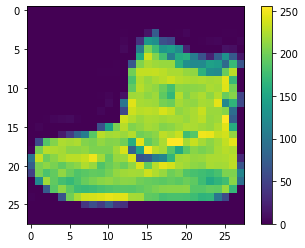

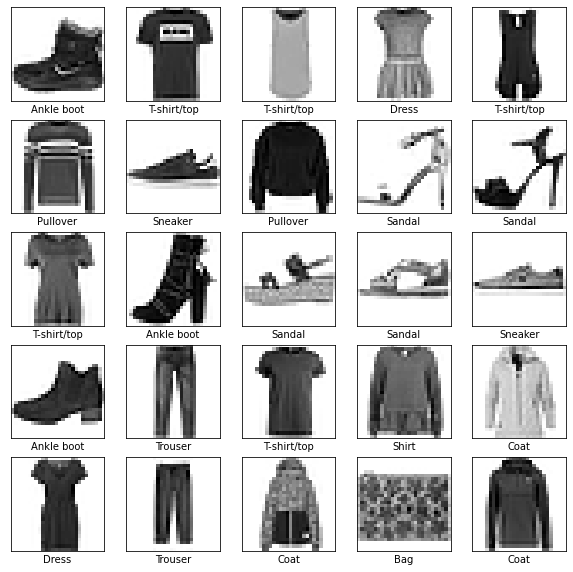

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4999 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3805 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3139 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2945 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2466 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

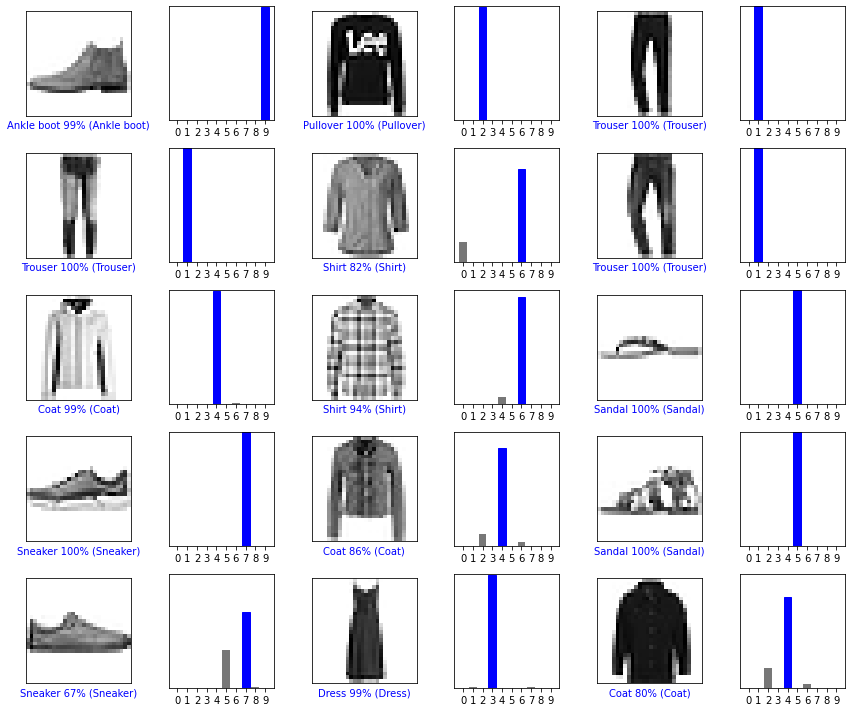

(28, 28)
(1, 28, 28)
[[2.9053619e-05 7.4275197e-16 9.9881124e-01 6.3246536e-10 1.1136452e-03
  1.4634278e-12 4.6071127e-05 3.3519201e-17 1.6254170e-11 9.7265259e-16]]


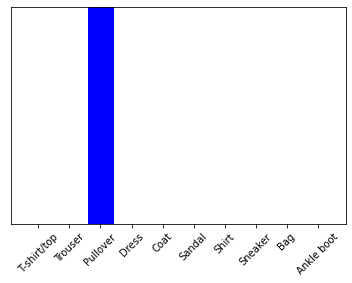

2

In [ ]:
# Függőségek
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Adat beolvasás
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
train_labels
test_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0